# 1. Background

### The H1B Application Process

The H-1B is a visa that allows American employers to employ foreign workers temporarily (three years) for occupations that require a bachelor’s degree or higher. Unsurprisingly, the H-1B is the most commonly applied visa status for international students who have graduated from American institutions and begin working in full-time positions. 
Before an H-1B petition is processed by United States Citizenship and Immigration Services (USCIS), a Labor Condition Application (LCA) must first be submitted to the Employment and Training Administration (ETA) within the Department of Labor (DOL) and certified by a DOL official. This document is intended to guarantee a foreign worker certain rights -- some of which include fair pay (i.e. the same as other employees in that position or the standard in the region for that position) and standard working conditions. 
The LCA will then be disclosed to employees in the area, respective labor unions, and eventually the public. The dataset we selected for this report is from the LCA disclosure dataset from fiscal year 2019 (October 1, 2018 to September 30, 2019) and is available here: https://www.foreignlaborcert.doleta.gov/performancedata.cfm#dis

### About the Dataset
As previously mentioned, the data for all LCAs filed is made available to the public by the DOL’s ETA. Each row in the dataset corresponds with one LCA. 

### What We Want to Investigate in this Dataset
In this project, we wish to explore the effect of various demographics and employment qualities on not only the certification process for H-1B visa, but also the demand for international talent across the U.S. We can roughly divide our investigative interests into two categories: what the dataset indicates about the employee and what the dataset indicates about the employer. 

With this information, international students can have a better idea of the details regarding H-1B visas, such as how often the H-1B should be renewed, whether having a legal agent could improve the applicant’s certification rate, and which states or industries have the largest demand for international talent. In addition to the basic features of H-1B applications, we also want to provide more guidance for international students. For example, how should they structure their recruitment timeline to fit in the optimal H-1B submission timeline, which industries offer the most H-1B sponsorships, and what areas contain the most career opportunities.

### Variables in the Dataset
For the purposes of this project, we chose to keep the following variables: 
* CASE_STATUS
    * An LCA can be “Certified”, “Denied”, “Withdrawn”, or “Certified-Withdrawn. This status is associated with the last significant event or decision. 
    * A status of “Certified” means that the applicant is eligible to submit an application for H-1B. 
    * A status of “Certified-Withdrawn” means that the applicant is eligible to apply but the employer withdraw the application before an H-1B petition was submitted. This typically occurs because the individual originally applying for H-1B is no longer working there
    * A status of “Denied” means not that the applicant is not eligible to apply. 
    * A status of “Withdrawn” the employer withdraw the application before the DOL had made a decision about it. 
* VISA_CLASS
    * This variable differentiates between different categories of H-1B visas. 
    * E-3 Australian, H-1B1 Chile, and H-1B1 Singapore are H-1B applications specific to individuals applying from Australia, Chile and Singapore. 
    * We decided to keep observations that correspond to general H-1B applicants, as there are some policy differences between the other groups. 
* SOC_CODE
    * This variable is the occupational code for the position the applicant is hoping to work in.
    * The first 2 digits represent a general occupation sector (i.e. SOC codes where the first two digits are ‘15’ correspond to Computer and Mathematical Occupations)
* SOC_NAME
    * This variable is the occupational name for the position the applicant is hoping to work in.
* H1B_DEPENDENT
    * This variable indicates whether an employer is H-1B dependent or not.
    * H-1B dependence is a status that is assigned according to the number or proportion of H-1B workers a company has. 
    * For a company that employs more than 50 full-time employees, it is H-1B dependent if 15% or more of those employees are H-1B nonimmigrant workers. 
* AGENT_REPRESENTING_EMPLOYER
    * This variable takes on values of Y or N and signifies whether the employer is represented by agent or attorney in the H-1B application process.
* NEW_EMPLOYMENT 
    * This variable indicates that the requested worker will begin working with a new employer.
* CONTINUED_EMPLOYMENT 
    * This variable indicates that the requested worker will be continuing to work for the same employer
* CHANGE_PREVIOUS_EMPLOYMENT
    * This variable indicates that the requested worker will begin working with the same employer but with a change to their job
* NEW_CONCURRENT_EMPLOYMENT
    * This variable indicates that the requested worker will begin working with an additional employer. 
* CHANGE_EMPLOYER
    * This variable indicates that the requested worker will begin working for a new employer, specifically in the same occupation they had worked in prior.
* AMENDED_PETITION
    * This variable indicates that the requested worker will be continuing to work for the same employer, but with a different position
* FULL_TIME_POSITION
    * This variable takes on values Y or N, indicating whether the position they are applying under is a full time position or a part time position.
* PREVAILING_WAGE
    * This variable is the prevailing wage for the occupation the applicant is applying under, in the location that they apply in. 
* PW_UNIT_OF_PAY
    * This variable indicates the unit of pay the prevailing wage is recorded in.
    * The values it takes on are: “Daily", “Hour", “Bi-Weekly", “Week", “Month", “Year"
* PW_WAGE_LEVEL
    * This variable indicates the wage levels or categories of the prevailing wage.
    * The values it takes on are: 1, 2, 3, 4, NA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [2]:
H1b = pd.read_excel('H-1B_Disclosure_Data_FY2019.xlsx')

In [3]:
H1b.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,APPX_A_FIELD_OF_STUDY_3,APPX_A_DATE_OF_DEGREE_3,APPX_A_NO_OF_EXEMPT_WORKER_4,APPX_A_NAME_OF_INSTITUTION_4,APPX_A_FIELD_OF_STUDY_4,APPX_A_DATE_OF_DEGREE_4,APPX_A_NO_OF_EXEMPT_WORKER_5,APPX_A_NAME_OF_INSTITUTION_5,APPX_A_FIELD_OF_STUDY_5,APPX_A_DATE_OF_DEGREE_5
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,NaT,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",CANDACE ROMERO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,NaT,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,NaT,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
clean = H1b.dropna(axis = 1, thresh= H1b.shape[0] / 3)
clean = clean.query('VISA_CLASS == "H-1B"')
clean = clean.query('CASE_STATUS != "WITHDRAWN"')
clean.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",800 GESSNER ROAD,HOUSTON,...,36.00,0.00,Hour,N,HOUSTON,TX,FL,77024,N,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,...,50000.00,0.00,Year,N,Richardson,TX,TX,75080,N,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,...,207777.00,0.00,Year,N,Richardson,Dallas,TX,75080,N,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,4705 EDGEWOOD DRIVE,NEW BERN,...,7.95,7.95,Hour,N,New Bern,Craven,NC,28562,N,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",2820 PAN AMERICAN BLVD,NORTH PORT,...,8.46,10.00,Hour,Y,NORTH PORT,florida,FL,34287,N,N


# 2. Exploratory Analysis of the Data

## I. Variables Pertaining to the Individual Applicant (Employee)

### A. Case Status (CASE_STATUS)

In [5]:
clean['CASE_STATUS'].describe()

count        629857
unique            3
top       CERTIFIED
freq         584269
Name: CASE_STATUS, dtype: object

In [6]:
clean['CASE_STATUS'].unique()

array(['DENIED', 'CERTIFIED', 'CERTIFIED-WITHDRAWN'], dtype=object)

In [7]:
clean['CASE_STATUS'].value_counts(normalize=True)

CERTIFIED              0.927622
CERTIFIED-WITHDRAWN    0.064176
DENIED                 0.008202
Name: CASE_STATUS, dtype: float64

In [8]:
case_status = clean['CASE_STATUS'].value_counts(normalize=True)

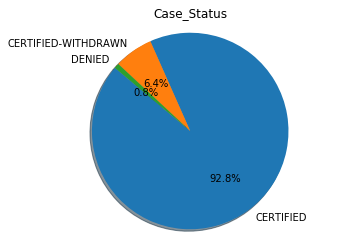

In [9]:
_ = plt.pie(case_status, labels = ["CERTIFIED","CERTIFIED-WITHDRAWN","DENIED"],
autopct='%1.1f%%', shadow=True, startangle=140)
_ = plt.title("Case_Status")
_ = plt.axis('equal')
plt.show()

CASE_STATUS shows whether an application has the eligibility to pass into the lottery part of H-1B selection.

From the summary of the data, we can see that among the total 629857 entries, there are three categories, 'DENIED', 'CERTIFIED', 'CERTIFIED-WITHDRAWN', each representing a status for whether a certain application is certified or not. The category with most entries is "CERTIFIED", representing 92.8% of the total entries; the category with least entries is "DENIED", only 0.8% of total entries. We can conclude from the graph above that most of the applications get certified.

### B. Employment Start & End Date (EMPLOYMENT_END_DATE, EMPLOYMENT_START_DATE)

In [10]:
clean.EMPLOYMENT_END_DATE.describe()

count                  629857
unique                   1603
top       2022-08-31 00:00:00
freq                    14164
first     2017-09-01 00:00:00
last      2023-12-31 00:00:00
Name: EMPLOYMENT_END_DATE, dtype: object

In [11]:
clean.EMPLOYMENT_START_DATE.describe()

count                  629857
unique                   1547
top       2019-09-01 00:00:00
freq                    18951
first     2014-09-01 00:00:00
last      2020-03-31 00:00:00
Name: EMPLOYMENT_START_DATE, dtype: object

EMPLOYMENT_END_DATE and EMPLOYMENT_START_DATE represent the end and start date for the applicant's employment contract with their respective employer. The range of EMPLOYMENT_END_DATE is from 2017-09-01 to 2023-12-31, with the most frequent entry being 2022-08-31. The range of EMPLOYMENT_START_DATE is from 2014-09-01 to 2020-03-31, with the most frequent entry being 2019-09-01.

We are interested in exploring how often employers/applicants need to update their H-1B. We can infer this time interval from examining the duration of the employment for these applications. Therefore, we need to take the difference between EMPLOYMENT_START_DATE and EMPLOYMENT_END_DATE.

In [12]:
clean['Duration'] = clean.EMPLOYMENT_END_DATE - clean.EMPLOYMENT_START_DATE

In [13]:
clean.groupby('Duration')['CASE_STATUS'].count()

Duration
-1 days           4
1 days            7
2 days            2
3 days            2
4 days            7
5 days            2
6 days           15
7 days           11
8 days            4
9 days            5
10 days          28
11 days           1
12 days           3
13 days           8
14 days           3
15 days          11
16 days           1
17 days           2
18 days           5
19 days           5
20 days           7
21 days           7
22 days           2
23 days           8
24 days           5
25 days           5
26 days           3
27 days           3
28 days           3
29 days           9
              ...  
1075 days       121
1076 days       110
1077 days       109
1078 days       209
1079 days       197
1080 days       129
1081 days       336
1082 days       260
1083 days       183
1084 days       181
1085 days       322
1086 days       287
1087 days       291
1088 days       559
1089 days       588
1090 days       417
1091 days      1141
1092 days       861
1093 days  

Here, the value of "-1 days" seemed odd. Why are there values of '-1 days' if EMPLOYMENT_END_DATE should always be later than EMPLOYMENT_START_DATE?

In [14]:
clean[clean['Duration'] == '-1 days +00:00:00']

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B,Duration
213743,I-200-19064-915612,DENIED,2019-03-05,2019-03-11,H-1B,2019-09-01,2019-08-31,VSION TECHNOLOGIES INC.,507 DENALI PASS SUITE 602,CEDAR PARK,...,116000.0,Year,Y,Princeton,Mercer,NJ,08540,N,Y,-1 days
265353,I-200-19228-946322,DENIED,2019-08-26,2019-08-27,H-1B,2019-08-23,2019-08-22,"SERVICENOW, INC.",2225 LAWSON LANE,SANTA CLARA,...,140000.0,Year,N,Santa Clara,Santa Clara,CA,95054,N,NaN,-1 days
320518,I-200-19158-430239,DENIED,2019-06-07,2019-06-11,H-1B,2019-11-29,2019-11-28,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,MOUNTAIN VIEW,...,204000.0,Year,N,Mountain View,Santa Clara,CA,94043,N,NaN,-1 days
491745,I-200-19260-866082,DENIED,2019-09-17,2019-09-18,H-1B,2019-09-17,2019-09-16,CIBER GLOBAL LLC,3270 WEST BIG BEAVER ROAD,TROY,...,NaN,Year,N,Baton Rouge,East Baton Rouge Parish,LA,70802,N,NaN,-1 days


It did not make sense for these entries to have employment end dates that are earlier than the employment start dates, so we decided to drop these entries.

In [15]:
clean_timediff = clean[clean['Duration'] != '-1 days +00:00:00']

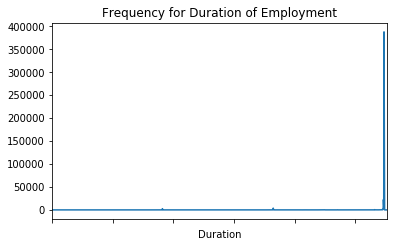

In [16]:
_ = clean_timediff.groupby('Duration')['CASE_STATUS'].count().plot()
_ = plt.title("Frequency for Duration of Employment")
plt.show()

From the frequency graph, most of the entries are concentrated in a certain narrow interval.

In [17]:
print(clean_timediff.Duration.describe())

count                       629853
mean     1067 days 03:48:01.135122
std       126 days 07:42:46.779916
min                1 days 00:00:00
25%             1095 days 00:00:00
50%             1095 days 00:00:00
75%             1096 days 00:00:00
max             1460 days 00:00:00
Name: Duration, dtype: object


In [18]:
len(clean_timediff.groupby('Duration')['CASE_STATUS'].count())

1104

In [19]:
clean_timediff.groupby('Duration')['CASE_STATUS'].count().idxmax()

Timedelta('1095 days 00:00:00')

In [20]:
clean_timediff.groupby('Duration')['CASE_STATUS'].count().max()

388176

In [21]:
(clean_timediff.groupby('Duration')['CASE_STATUS'].count().max())/clean_timediff.shape[0]*100

61.629618339517314

The summary of time difference between employment start and end date illustrates that application renewal time intervals range from 1 day to 1460 days (4 years). 

The time interval with the most entries (61.63% of total entries) is 1095 days (3 years), indicating that the working contract between the H-1B applicant and their employer typically lasts three years. 

This is consistent with the H-1B stated renewal policy -- each H-1B visa is good for three years, with the option to renew once at the end of that time frame. 

### C. Application Submitted and Decision Announced Dates (CASE_SUBMITTED, DECISION_DATE)

In [22]:
clean.CASE_SUBMITTED.describe()

count                  629857
unique                   1300
top       2019-03-13 00:00:00
freq                    10885
first     2014-03-04 00:00:00
last      2019-09-28 00:00:00
Name: CASE_SUBMITTED, dtype: object

In [23]:
clean.DECISION_DATE.describe()

count                  629857
unique                    348
top       2019-03-21 00:00:00
freq                    17412
first     2018-10-01 00:00:00
last      2019-09-30 00:00:00
Name: DECISION_DATE, dtype: object

CASE_SUBMITTED and DECISION_DATE represents the date the application was submitted and the date when the DOL makes a decision on whether this application gets certified. The range of CASE_SUBMITTED is from 2014-03-04 to 2019-09-28, with the most frequent entry being 2019-03-13; and the range of EMPLOYMENT_START_DATE is from 2018-10-01 to 2019-09-30, with the most frequent entry being 2019-03-21.

We are interested in finding out what time of the year most employers submit an LCA (and subsequently an H-1B petition) for their employees. 

First, when are most applications submitted and when do most applications receive decisions? 

In [24]:
clean['CASE_SUBMITTED_MONTH']=clean['CASE_SUBMITTED'].dt.month

In [25]:
clean['CASE_SUBMITTED_MONTH'].value_counts(normalize=True)

3     0.314562
2     0.131428
4     0.074396
5     0.065985
1     0.062438
6     0.058917
8     0.057804
7     0.054554
9     0.049932
10    0.047563
11    0.042691
12    0.039731
Name: CASE_SUBMITTED_MONTH, dtype: float64

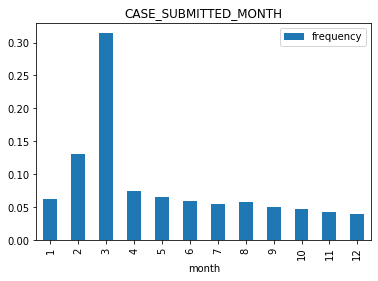

In [26]:
CASE_SUBMITTED_MONTH = clean['CASE_SUBMITTED_MONTH'].value_counts(normalize=True).reset_index()
CASE_SUBMITTED_MONTH.columns = ["month","frequency"]
CASE_SUBMITTED_MONTH = CASE_SUBMITTED_MONTH.sort_values('month')
_ = CASE_SUBMITTED_MONTH.plot(kind='bar',x='month',y='frequency')
_ = plt.title("CASE_SUBMITTED_MONTH")

In [27]:
clean['DECISION_DATE_MONTH']=clean['DECISION_DATE'].dt.month

In [28]:
clean['DECISION_DATE_MONTH'].value_counts(normalize=True)

3     0.310896
2     0.106494
4     0.086577
5     0.068725
8     0.062005
7     0.061400
6     0.057180
1     0.053314
9     0.052529
10    0.050959
12    0.044967
11    0.044955
Name: DECISION_DATE_MONTH, dtype: float64

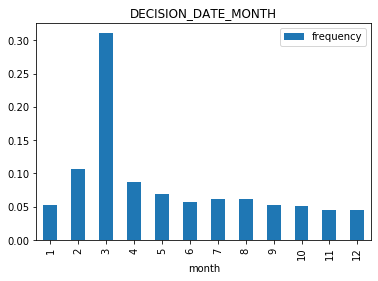

In [29]:
DECISION_DATE_MONTH = clean['DECISION_DATE_MONTH'].value_counts(normalize=True).reset_index()
DECISION_DATE_MONTH.columns = ["month","frequency"]
DECISION_DATE_MONTH = DECISION_DATE_MONTH.sort_values('month')
_ = DECISION_DATE_MONTH.plot(kind='bar',x='month',y='frequency')
_ = plt.title("DECISION_DATE_MONTH")

These graphs indicate that the greatest number of applications received are received during March, implying that employers usually submit their LCA in March.

The results from DECISION_DATE tells us usually when the decisions are made during March. Interestingly, the distribution of decision date and the submission date is rather similar.

Besides understanding the two dates themselves, we are also interested in understanding how long it usually takes for the DOL to process an application.

Toward this end, we first take the difference between these two dates.

In [32]:
clean['DECISION_TIME_INTERVAL'] = clean.DECISION_DATE - clean.CASE_SUBMITTED

In [33]:
clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().head()

DECISION_TIME_INTERVAL
0 days        3
1 days      760
2 days      942
3 days      464
4 days    96027
Name: CASE_STATUS, dtype: int64

Just as before, we notice some odd values in this process. Specifically, we see that decisions are sometimes given on the same day the application is submitted.

In [34]:
clean[clean['DECISION_TIME_INTERVAL'] == '0 days +00:00:00']

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B,Duration,CASE_SUBMITTED_MONTH,DECISION_DATE_MONTH,DECISION_TIME_INTERVAL
567726,I-200-19204-056827,DENIED,2019-07-24,2019-07-24,H-1B,2019-07-23,2022-07-23,DATA SOLUTIONS INC.,"28345 BECK ROAD, SUITE 406",WIXOM,...,Cupertino,Santa Clara,CA,95014,N,NaN,1096 days,7,7,0 days
633189,I-200-19246-529324,DENIED,2019-09-04,2019-09-04,H-1B,2019-09-04,2022-09-04,ERNST & YOUNG U.S.LLP,200 PLAZA DRIVE,SECAUCUS,...,Louisville,Jefferson,KY,40202,N,NaN,1096 days,9,9,0 days
662351,I-200-19198-968145,DENIED,2019-08-08,2019-08-08,H-1B,2019-07-22,2022-07-22,ERNST & YOUNG U.S. LLP,200 PLAZA DRIVE,SECAUCUS,...,Bellevue,King,WA,98008,N,NaN,1096 days,8,8,0 days


Looks like all three of these entries indicate a case status of "Denied". Some possible explanations for this may include a failure to pass the machine selection process or an exclusion of some crucial documents, both of which may have led to an immediate denial of certification. 

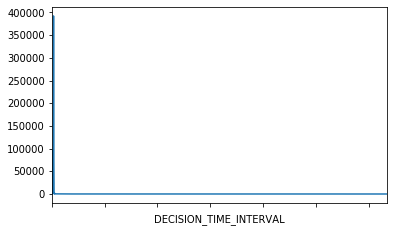

In [35]:
_ = clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().plot()

From the frequency graph, we see that most of the entries are concentrated in a certain narrow interval. We need to further narrow down the range of decision time interval to draw further insights.

In [36]:
print(clean.DECISION_TIME_INTERVAL.describe())

count                      629857
mean      29 days 07:00:43.581320
std      123 days 19:01:18.165148
min               0 days 00:00:00
25%               6 days 00:00:00
50%               6 days 00:00:00
75%               6 days 00:00:00
max            1827 days 00:00:00
Name: DECISION_TIME_INTERVAL, dtype: object


In [37]:
len(clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count())

1270

In [38]:
clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().idxmax()

Timedelta('6 days 00:00:00')

In [39]:
clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().max()

392297

In [40]:
(clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().max())/clean.shape[0]*100

62.283502445793246

The summary of time difference between application submitted date and decision date indicates that decision time intervals range from 0 days to 1827 days (5 years). 

The most frequent time interval (62.28% of total observations) is 6 days, which means that a decision on certification will typically be made after 6 days of processing. This decision period is actually quite short!

### D. Type of Position (FULL_TIME_POSITION)

In [41]:
full_prop = clean.FULL_TIME_POSITION.value_counts(normalize = True) * 100
full_prop = full_prop.round(2)
full_prop

Y    98.36
N     1.64
Name: FULL_TIME_POSITION, dtype: float64

An overwhelming percentage of 98.36% are full-time employees and only 1.64% are part-time employees.

In [42]:
full = clean.groupby('FULL_TIME_POSITION').CASE_STATUS.value_counts(normalize = True).unstack('CASE_STATUS')
full

CASE_STATUS,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED
FULL_TIME_POSITION,,,
N,0.921764,0.045080,0.033156
Y,0.927719,0.064494,0.007786


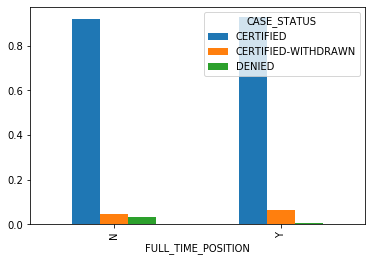

In [43]:
_ = full.plot.bar()

Although most applicants for the LCA are full-time workers, we wanted to investigate whether part-time employees would enjoy equal opportunity in certification for their LCA. Interestingly, based on percentages of case status, we see that both full and part time workers have almost the same proportion of certified applications (around 92%).

We now want to investigate where part-time employees are going to work. 

NEW YORK            1090
LOS ANGELES          201
FLUSHING             186
HOUSTON              182
BROOKLYN             147
BOSTON               143
CITY OF INDUSTRY     139
CHICAGO              127
SAN JOSE             121
SAN FRANCISCO        107
dtype: int64


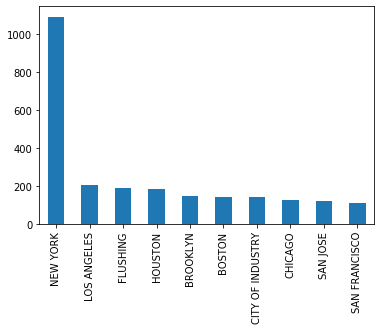

In [44]:
part = clean.query('FULL_TIME_POSITION == "N"')

city = pd.Series([i.upper() for i in part.WORKSITE_CITY.astype(str)])
print(city.value_counts().head(10))
_ = city.value_counts().head(10).plot.bar()

It appears that most of the part-time workers are working for employers in New York. As we will see later, these top 10 applied-to cities for part time workers are consistent with the locations recorded in the rest of the dataset. 

We are also interested in seeing what kinds of occupations part-time applicants are pursuing.

In [45]:
part = clean.query('FULL_TIME_POSITION == "N"')
part.SOC_NAME.value_counts().head(10)

ACCOUNTANTS AND AUDITORS                              1048
SOFTWARE DEVELOPERS, APPLICATIONS                      995
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS     525
FINANCIAL ANALYSTS                                     422
PHYSICIANS AND SURGEONS, ALL OTHER                     375
MANAGEMENT ANALYSTS                                    370
COMPUTER OCCUPATIONS, ALL OTHER                        344
PHYSICAL THERAPISTS                                    245
HEALTH SPECIALTIES TEACHERS, POSTSECONDARY             227
LAWYERS                                                189
Name: SOC_NAME, dtype: int64

It appears that part-time employees mostly work as in the accounting/finance, software development, medical, and law fields.

### E.  Employment Title and Categories (JOB_TITLE, SOC_CODE, SOC_NAME)

Since the variable JOB_TITLE is quite specific and contain quite a few keywords that are not easy to group by, we will use the first two digits in SOC_CODE to categorize the different occupations applicants are pursuing. By extracting these two digits and maping them to the SOC names they are associated with, we can analyze the kinds of occupations H-1B applicants are applying for in these bigger groups.

In [46]:
clean.SOC_CODE.str[0:2].unique()
# clean.SOC_CODE.str[0:2].value_counts()

array(['17', '19', '25', '39', '31', '49', '29', '13', '43', '11', '47',
       '37', '35', '27', '45', '21', '51', '41', '23', '15', '53', '12',
       '33', nan, 'OP'], dtype=object)

In [47]:
dict = {'11' : 'Management Occupations',
'13' : 'Business and Financial Operations Occupations',
'15' : 'Computer and Mathematical Occupations',
'17' : 'Architecture and Engineering Occupations',
'19' : 'Life, Physical, and Social Science Occupations',
'21' : 'Community and Social Service Occupations',
'23' : 'Legal Occupations',
'25' : 'Education, Training, and Library Occupations',
'27' : 'Arts, Design, Entertainment, Sports, and Media Occupations',
'29' : 'Healthcare Practitioners and Technical Occupations',
'31' : 'Healthcare Support Occupations',
'33' : 'Protective Service Occupations',
'35' : 'Food Preparation and Serving Related Occupations',
'37' : 'Building and Grounds Cleaning and Maintenance Occupations',
'39' : 'Personal Care and Service Occupations',
'41' : 'Sales and Related Occupations',
'43' : 'Office and Administrative Support Occupations',
'45' : 'Farming, Fishing, and Forestry Occupations',
'47' : 'Construction and Extraction Occupations',
'49' : 'Installation, Maintenance, and Repair Occupations',
'51' : 'Production Occupations',
'53' : 'Transportation and Material Moving Occupations'}

In [48]:
clean['JOB_TYPE']=clean.SOC_CODE.str[0:2].map(dict)

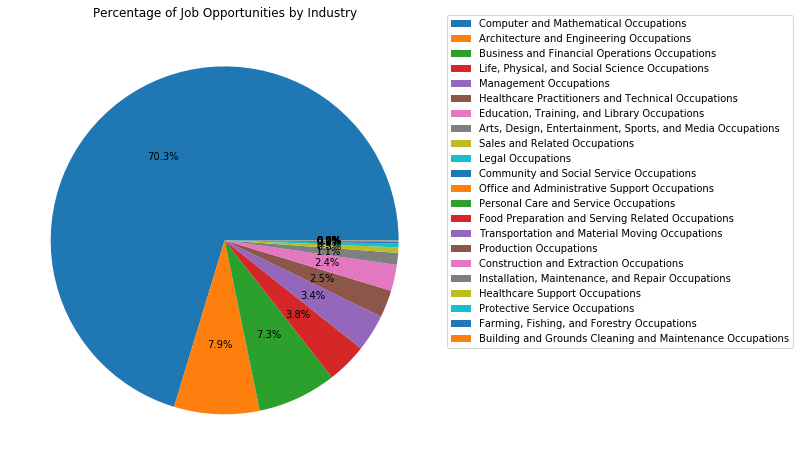

In [49]:
_ = plt.figure(figsize = (14,8))
_ = plt.pie(clean['JOB_TYPE'].value_counts(normalize=True), autopct='%.1f%%')
_ = plt.legend(clean['JOB_TYPE'].value_counts(normalize=True).index,bbox_to_anchor=(1, 1.03))
_ = plt.title('Percentage of Job Opportunities by Industry')

This pie chart shows us that most applicants are pursuing Computer and Mathematical occupations, taking about 70.3% of all applications. 

### F. Prevailing Wage

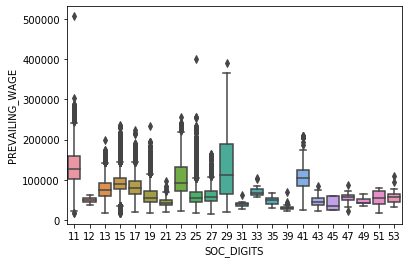

In [50]:
clean['SOC_DIGITS'] = [str(x)[:2] for x in clean.SOC_CODE]

import seaborn as sns
to_plot = clean[clean.PW_UNIT_OF_PAY == "Year"]
to_plot = to_plot.query('SOC_DIGITS != "OP"')
to_plot = to_plot.query('SOC_DIGITS != "na"')
_=sns.boxplot(x=to_plot.SOC_DIGITS,y=to_plot.PREVAILING_WAGE)

First, we notice that there are significant differences between SOC industry groups. 

Excluding outliers, the groups with the highest values for prevailing wage are group 29 (Healthcare Practitioners and Technical Occupations), then group 11 (Management Occupations), then group 23 (Legal Occupations), group 41 (Sales and Related Occupations) and group 15 (Computer and Mathematical Occupations). 

## II. Variables Pertaining to the Employer

### A. Location (City, Postal Code, etc.)

We are interested in seeing which physical locations (states) the employers are applying from.

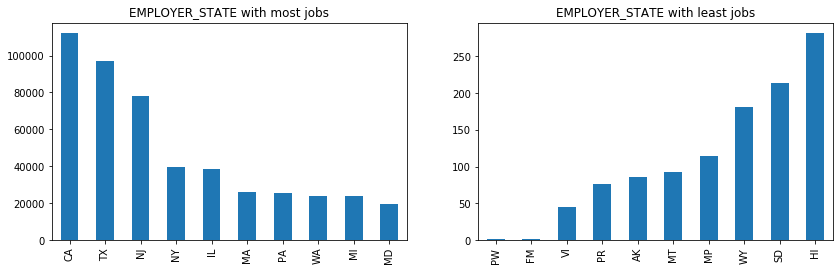

In [51]:
_ = plt.figure(figsize = (14,4))

_ = plt.subplot(1,2,1)
_ = clean.EMPLOYER_STATE.value_counts().head(10).plot.bar()
_ = plt.title('EMPLOYER_STATE with most jobs')

_ = plt.subplot(1,2,2)
_ = clean.EMPLOYER_STATE.value_counts(ascending=True).head(10).plot.bar()
_ = plt.title('EMPLOYER_STATE with least jobs')

The top 3 states with most job opportunities are California, Texas, and New Jersey.
The top 3 areas with least job opportunities are Palau, Federated States of Micronesia, and Virgin Islands.

We would like to contrast this with the locations the employees are actually working from.

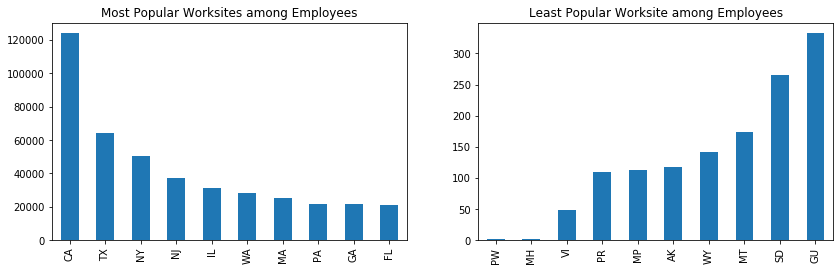

In [52]:
_ = plt.figure(figsize = (14,4))

_ = plt.subplot(1,2,1)
_ = clean.WORKSITE_STATE.value_counts().head(10).plot.bar()
_ = plt.title('Most Popular Worksites among Employees')

_ = plt.subplot(1,2,2)
_ = clean.WORKSITE_STATE.value_counts(ascending=True).head(10).plot.bar()
_ = plt.title('Least Popular Worksite among Employees')
plt.show()

Though there are some differences, the general distribution of worksite states is quite similar to the general distribution of employer locations. 

The top 3 states with most job opportunities are California, Texas, and New York.
The top 3 areas with least job opportunities are Palau, Marshall Islands, and Virgin Islands.

Now, we will plot employer locations on a map to visualize where most LCAs are coming from.

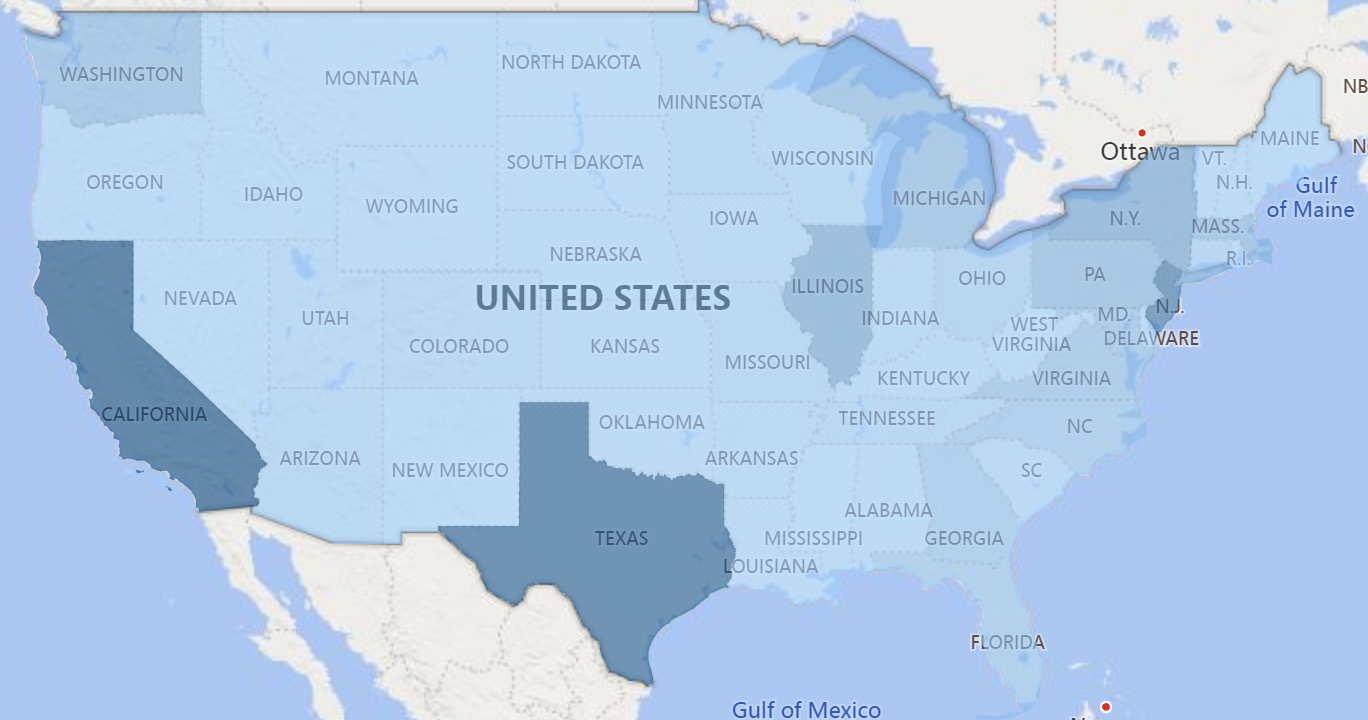

In [89]:
from IPython.display import Image
Image(filename= "/Users/Roger/Documents/Stats131_H1B/colormap.png")

We are interested in the importance of location and how it correlates with whether an employer depends on international talent. Looking at the number of H1B dependent employers, it seems like companies in California, Texas, New York, and New Jersey heavily recruits international workers. 

According to our research, the first digit of zip codes represents the national area. (US is divided into 9 differents regions in this way) We subset and ignore all the zip codes not starting with a digit of 0-9.

In [53]:
clean.EMPLOYER_POSTAL_CODE.str[0].unique()
#clean.EMPLOYER_POSTAL_CODE.str[0].value_counts()[0:10]
clean['ZIP_REGION'] = clean.EMPLOYER_POSTAL_CODE.str[0]

array(['7', '2', '3', '9', '5', '4', '0', '8', '1', '6', 'L', 'M', nan,
       'C', 'K', 'F', 'E', 'S', 'J', 'N', 'R', 'V', 'A', 'O', 'W', 'H',
       'D', 'P', 'B'], dtype=object)

In [54]:
index=clean.WORKSITE_POSTAL_CODE.str[0].str.isdigit()
index=index.fillna(False)

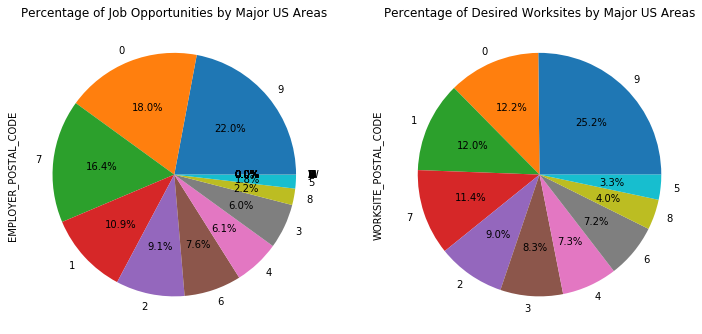

In [55]:
_ = plt.figure(figsize = (12,16))
_ = plt.subplot(1,2,1)
good_zips = clean[index.tolist()]
_ = clean[index.tolist()].EMPLOYER_POSTAL_CODE.str[0].value_counts(normalize=True).plot.pie(autopct='%.1f%%')
_ = plt.title('Percentage of Job Opportunities by Major US Areas')

_ = plt.subplot(1,2,2)
_ = clean[index.tolist()].WORKSITE_POSTAL_CODE.str[0].value_counts(normalize=True).plot.pie(autopct='%.1f%%')
_ = plt.title('Percentage of Desired Worksites by Major US Areas')
plt.show()

Here, we created two pie charts to visualize the differences between the distribution of employer locations as well as the distribution of employee worksites. Again, the two are quite similar.

We can see areas with code that starts with 9 are the most desired working area among employees. 9 represents the west coast regions and some outlying islands. This makes sense because it includes states like CA and WA.

The following high frequency regions starts with 0 and 1, with 0 representing the New England region and 1 being Delaware, New York, and Pennsylvania.

The overall distribution matches the job opportunity locations (EMPLOYER_STATE) pretty well. So we can see that the Demand and Supply roughly alignes in the H1B job market.
https://smartystreets.com/docs/zip-codes-101

### B. Legal Assistance

We first want to investigate the proportion of cases that are represented by an attorney.

In [56]:
legal = clean.AGENT_REPRESENTING_EMPLOYER.value_counts(normalize = True) * 100
legal = legal.round(2)
legal

Y    70.21
N    29.79
Name: AGENT_REPRESENTING_EMPLOYER, dtype: float64

In [57]:
chance = clean.groupby('CASE_STATUS')["AGENT_REPRESENTING_EMPLOYER"].value_counts(normalize = True).unstack("AGENT_REPRESENTING_EMPLOYER")
chance

AGENT_REPRESENTING_EMPLOYER,N,Y
CASE_STATUS,,
CERTIFIED,0.297176,0.702824
CERTIFIED-WITHDRAWN,0.326251,0.673749
DENIED,0.295098,0.704902


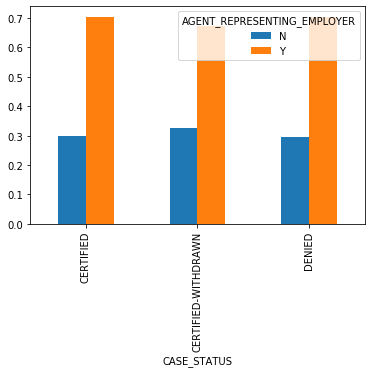

In [58]:
_ = chance.plot.bar()

It appears that, when we group the data by case status categories, the calculated proportions of applications represented by an agent in each category is very close to the overall proportion of applications represented by an agent. This indicates that we cannot tell if a particular application had a representing attorney from just the case status.

GOOGLE LLC, AMAZONCOM SERVICES INC, and ELECTRIC POWER RESEARCH INSTITUTE INC. are the companies that have the greatest number of unique attorneys/agents. 

### C. Company's H1B Dependence

We found the H1B_DEPENDENT variable interesting and wanted to investigate the different variables that a company’s H-1B dependence might be associated with.

In [61]:
h1b_dep = clean[clean.H1B_DEPENDENT == 'Y']
h1b_ndep = clean[clean.H1B_DEPENDENT == 'N']

In [62]:
len(h1b_dep)/len(clean)

0.3679247829269183

We found that the majority of applications were submitted by employers who are not H-1B dependent. 

We then wanted to investigate the different types of occupations H-1B dependent or H-1B independent companies tended to file H-1B petitions for. 

In [63]:
clean.groupby('EMPLOYER_NAME').CASE_STATUS.value_counts().sort_values(ascending = False).head(10)

EMPLOYER_NAME                           CASE_STATUS
COGNIZANT TECHNOLOGY SOLUTIONS US CORP  CERTIFIED      28105
INFOSYS LIMITED                         CERTIFIED      21401
TATA CONSULTANCY SERVICES LIMITED       CERTIFIED      11835
GOOGLE LLC                              CERTIFIED       9117
ERNST & YOUNG U.S. LLP                  CERTIFIED       8601
CAPGEMINI AMERICA INC                   CERTIFIED       7744
DELOITTE CONSULTING LLP                 CERTIFIED       7588
AMAZON.COM SERVICES, INC.               CERTIFIED       6714
MICROSOFT CORPORATION                   CERTIFIED       5889
ACCENTURE LLP                           CERTIFIED       5487
Name: CASE_STATUS, dtype: int64

It turns out, almost all applications submitted by H-1B dependent companies were for positions where the first two digits in the SOC code are “15”, or related to Computation and Mathematical Occupations. Most applications submitted by H-1B independent companies were also for Computation and Mathematical Occupations, but a significantly smaller proportion than for H-1B employers.

## III. Relationship between variables

### A. Time pattern for H1-B submission of different industries (CASE_SUBMITTED vs SOC_CODE)

From the analysis in EDA PART 1 individual variable analysis section 10, we've investigated the usual time interval between application submission date and decision date. 

However, as international students, we are also interested to know: when do different industries usually submit their H-1B applications? Are there certain industries submit their applications earlier than others? Probably the answers can provide guidance for students pursuing careers in those industries to arrange their recruitment timeline earlier to make sure that they catch up with the H-1B submission time pattern, since most companies only submit H1-B applications during a concentrated time interval each year, together for all employees who need this type of visa. 

In order to seperate different industries, we extract the first two digits of SOC_CODE, with a total of 55 numbers representing 55 different industries according to the Standard Occupational Classification Manual published by the US Executive Office of the President of the United States.

In [64]:
clean['INDUSTRY_CODE'] = clean.SOC_CODE.str[0:2]

In [65]:
clean.INDUSTRY_CODE.unique()

array(['17', '19', '25', '39', '31', '49', '29', '13', '43', '11', '47',
       '37', '35', '27', '45', '21', '51', '41', '23', '15', '53', '12',
       '33', nan, 'OP'], dtype=object)

The INDUSTRY_CODE was selected from SOC_CODE, which should be numbers from 1 to 55. However, here we saw nan and "OP". We are curious about what the data means. 

In [67]:
clean.query('INDUSTRY_CODE == "OP"')['SOC_CODE']

487525    OPERATIONS RESEARCH ANALYSTS
Name: SOC_CODE, dtype: object

This entry is incorrect, where the SOC_NAME was mistakenly input into SOC_CODE, so we drop this row.

In [68]:
clean_socright = clean.query('INDUSTRY_CODE != "OP"')

Now we investigate the nan in the INDUSTRY_CODE.

In [69]:
clean_socright[np.isnan(clean_socright.INDUSTRY_CODE.astype(float))]['SOC_CODE']

400045    NaN
427159    NaN
435477    NaN
460681    NaN
Name: SOC_CODE, dtype: object

The INDUSTRY_CODE which appears to be nan all have NaN in the original data SOC_CODE. Therefore, we drop these entries to make the data cleaner.

In [73]:
clean_socright = clean_socright[np.isnan(clean_socright.INDUSTRY_CODE.astype(float))==False]

In [74]:
clean_socright.INDUSTRY_CODE.unique()

array(['17', '19', '25', '39', '31', '49', '29', '13', '43', '11', '47',
       '37', '35', '27', '45', '21', '51', '41', '23', '15', '53', '12',
       '33'], dtype=object)

In [75]:
len(clean_socright['INDUSTRY_CODE'].unique())

23

We see that there are now 23 different industries represented in this dataset. 

Now the data is cleaned up, with all INDUSTRY_CODE in the expected range of integers from 1 to 55. Next, we want to find out for different industries, when the companies usually submit their application. We only select top 6 most popular industries with the most applications this year for reference.

In [76]:
industry_top = list(clean_socright['INDUSTRY_CODE'].value_counts().head(6).index)
industry_top

['15', '17', '13', '19', '11', '29']

In [77]:
industry_top_name = ['Computer and Mathematical Occupations','Architecture and Engineering Occupations','Business and Financial Operations Occupations','Life, Physical, and Social Science Occupations','Management Occupations','Healthcare Practitioners and Technical Occupations']
industry_top_name # Reference: STANDARD OCCUPATIONAL CLASSIFICATION MANUAL 2018

['Computer and Mathematical Occupations',
 'Architecture and Engineering Occupations',
 'Business and Financial Operations Occupations',
 'Life, Physical, and Social Science Occupations',
 'Management Occupations',
 'Healthcare Practitioners and Technical Occupations']

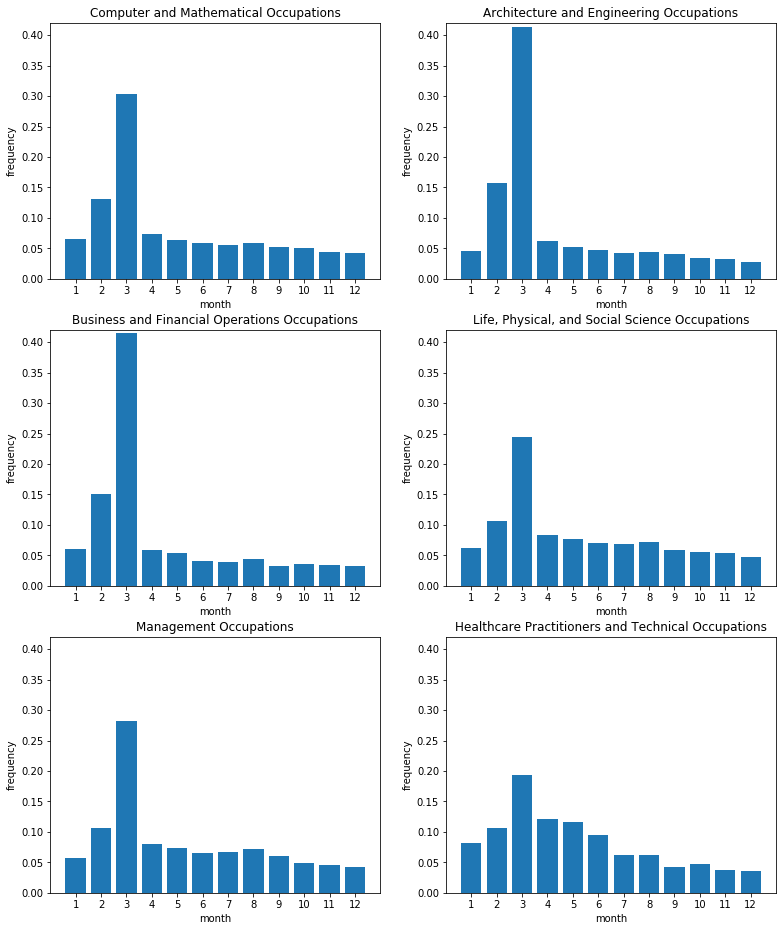

In [78]:
_=plt.figure(figsize = (13,16))
for i in range(len(industry_top)):
    _=plt.subplot(3,2,i+1)
    clean_new = clean_socright[clean_socright['INDUSTRY_CODE'] == industry_top[i]]['CASE_SUBMITTED_MONTH'].value_counts(normalize = True).reset_index()
    clean_new.columns = ["month","frequency"]
    clean_new = clean_new.sort_values('month')
    _=plt.bar(clean_new['month'].astype(str), clean_new['frequency'])
    #clean_new.plot(kind='bar',x='month',y='frequency')
    _=plt.ylim(0,0.42)
    _=plt.xlabel("month")
    _=plt.ylabel("frequency")
    _=plt.title(industry_top_name[i])

From the graphs of the top 6 categories of occupations, we can see that the patterns for the time of application submission are very similar. Most of the applications are submitted during the first half of the year. Curiously enough, March seems to be the month in which applications are most often submitted, irrespective of the kind of position applied for. 

One possible explanation for this could be that newly-graduated international students try to get a job before March, so that they won't miss the H1-B application process in most companies. 

Another possible explanation for the peak in March is that, when international students graduate during May (semester system) or June (quarter system), they are granted a 24-month extension on their stay at the US with an OPT visa. When time approaches March of the year after their graduation, usually they have to find a job at US, or their OPT will expire. 

Finally, the fact that the H-1B application opens on April 1 might provide the strongest reason as to why so many applications are submitted in the month of March. If an employer is to miss this deadline to submit the LCA for their employee, they would have to wait until the next year to receive a visa. 

### B. Legal Assistance and Case Status

In general, having a legal representative should increase one's chances of getting a particular desireable outcome. We would like to investigate the impact a legal representative has on the status of the case further.

In [79]:
import re
clean['EMPLOYER_NAME'] = [re.sub('[.!?\\-, ]', '', str(x) ) for x in clean['EMPLOYER_NAME']]

In [80]:
# investigating how often a particular employer will use an agent/attorney
cases_agent_employer = clean.groupby('EMPLOYER_NAME')['AGENT_REPRESENTING_EMPLOYER'].count()
tot_cases_employer = clean.groupby('EMPLOYER_NAME')['EMPLOYER_NAME'].count()
legal_assistance = cases_agent_employer/tot_cases_employer

In [81]:
legal_assistance[legal_assistance == 0].count()/legal_assistance.count()

0.021244993324432578

We see here that most companies will hire legal assistance at some point. 

In [82]:
legal_assistance[legal_assistance != 0].sort_values(ascending = True).head(10)

EMPLOYER_NAME
GOOGLEINC                            0.007299
MINDIQSOLUTIONSINC                   0.011111
TEKMUSKETEERSINC                     0.016129
ICOMINC                              0.020833
HEIGHTSGLOBALITSERVICECORPORATION    0.035714
FARADAY&AMP;FUTUREINC                0.041667
MARVELLTECHLLC                       0.049793
IBLESOFTINC#791327054                0.058824
VNSINFOSYSTEMSINC                    0.071429
SMARTITFRAMELLC                      0.081481
dtype: float64

This is a list of employers who are the least frequent users of attorneys (excluding employers who are never represented by an agent). 

Given these percentages, we would like to take a look at how many different attorneys an employer will use. 

In [83]:
# counting number of different attorneys used by employers
import re
clean['EMPLOYER_NAME'] = [re.sub('[.!?\\-, ]', '', str(x) ) for x in clean['EMPLOYER_NAME']]

attorney = clean[clean.AGENT_REPRESENTING_EMPLOYER == 'Y'].groupby(['EMPLOYER_NAME'])
attorney['AGENT_ATTORNEY_NAME'].nunique().sort_values(ascending = False).head(10)

EMPLOYER_NAME
GOOGLELLC                            26
AMAZONCOMSERVICESINC                 26
ELECTRICPOWERRESEARCHINSTITUTEINC    24
SALESFORCECOMINC                     23
WILSONSONSINIGOODRICH&ROSATIPC       21
ERNST&YOUNGUSLLP                     20
A2ZDEVELOPMENTCENTERINC              19
AMAZONWEBSERVICESINC                 19
PAYPALINC                            18
DELOITTECONSULTINGLLP                18
Name: AGENT_ATTORNEY_NAME, dtype: int64

Google and Amazon have the most number of unique attorneys. If we look at this list, we see that these employers tend to employ many people. Perhaps there are similarities between companies that are "big"?

We would like to investigate the tendencies of employers who submit more than 100 LCA applications in a given year.

In [84]:
tot_cases_employer[tot_cases_employer > 100].count()/tot_cases_employer.count()

0.012683578104138851

This group only makes up about 1.3% of the total population. Keeping this in mind (as it limits the scope of any conclusions we make), we will be examining trends within this group.

In [85]:
legal_big_comps = cases_agent_employer[tot_cases_employer > 100]/tot_cases_employer[tot_cases_employer > 100]

legal_big_comps.sort_values(ascending = True).head(10)

EMPLOYER_NAME
GOOGLEINC                       0.007299
MARVELLTECHLLC                  0.049793
SMARTITFRAMELLC                 0.081481
YANASOFTWAREINC                 0.220149
IBLESOFTINCDUNS#791327054       0.262376
MHKTECHINC                      0.319149
UNICORNTECHNOLOGIESLLC          0.325000
EDISQUAREINC                    0.371951
UNIVERSITYOFWISCONSINMADISON    0.373832
RELIANCEGLOBALSERVICESINC       0.375000
dtype: float64

This is the same table as above, only filtered by employers who have submitted more than 100 LCA. 

In [86]:
# some plots
legal_big_comps[legal_big_comps.isnull()] = 0
legal_big_comps2 = legal_big_comps.reset_index()
legal_big_comps_temp = legal_big_comps2.sort_values(0,ascending = True).head(100).sort_values(0, ascending = True)

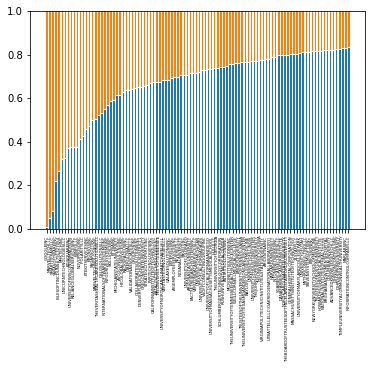

In [87]:
#companies that hire legal assistance the least
legal_big_comps_temp = legal_big_comps2.sort_values(0,ascending = True).head(100).sort_values(0, ascending = True)
_=plt.bar(legal_big_comps_temp['EMPLOYER_NAME'], legal_big_comps_temp[0], edgecolor='white')
_=plt.bar(legal_big_comps_temp['EMPLOYER_NAME'], 1-legal_big_comps_temp[0], bottom =  legal_big_comps_temp[0], edgecolor='white')
_=plt.ylim(0,1)
_=plt.xticks(rotation = 90, fontsize = 4)
plt.show()

We want to investigate how the presence of an agent affects the percentage of denials. In particular, we will take a look at how the frequency of an employer's usage of agent representatives might affect that employer's proportion of denied LCAs. 

In [88]:
denied = clean[clean.CASE_STATUS == 'DENIED'].groupby('EMPLOYER_NAME').size()
prop_denied = denied/clean.groupby('EMPLOYER_NAME').size()
comps = prop_denied[tot_cases_employer > 100]
comps[comps.isnull()] = 0

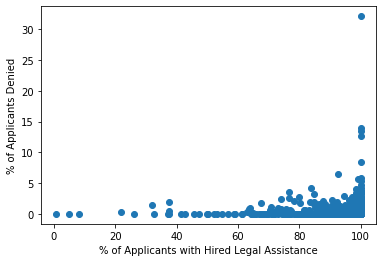

In [89]:
# visualizing prop denied vs percentage of cases w/ hired agents
to_plot = pd.concat([legal_big_comps*100, comps*100], axis = 1, ignore_index = True).reset_index()

_=plt.scatter(to_plot[0],to_plot[1])
_=plt.xlabel('% of Applicants with Hired Legal Assistance')
_=plt.ylabel('% of Applicants Denied')
_=plt.title('')
plt.show()

We see here that though the percentage of applications denied never rises above 30%, there seems to be a positive correlation between the percentage of hired legal assistance and the percentage of applications denied, per employer.  

In [90]:
comps[comps*100 > 25]

EMPLOYER_NAME
VSLNINTERNATIONALINC    0.320896
dtype: float64

### C. H-1B Dependence and SOC Code

In [94]:
# proportion of applications for each SOC_CODE attributed to D/ND H1B dependence status.
h1b_dep = clean[clean.H1B_DEPENDENT == 'Y']
h1b_ndep = clean[clean.H1B_DEPENDENT == 'N']

h1b_ndep_counts = h1b_ndep.groupby('SOC_DIGITS')['SOC_DIGITS'].count().sort_values(ascending = False)
h1b_dep_counts = h1b_dep.groupby('SOC_DIGITS')['SOC_DIGITS'].count().sort_values(ascending = False)

todf = {'D':h1b_dep_counts, 'ND':h1b_ndep_counts}
df = pd.DataFrame(todf)
df[df.isnull()] = 0

summed = df.cumsum(axis=0)
df.D = df.D/summed.iloc[len(summed)-1,0]
df.ND = df.ND/summed.iloc[len(summed)-1,1]
print(df)

           D        ND
11  0.009407  0.049101
12  0.000000  0.000005
13  0.019871  0.104537
15  0.931919  0.569866
17  0.026815  0.109770
19  0.002007  0.058267
21  0.000039  0.002929
23  0.000104  0.005579
25  0.000630  0.037996
27  0.003249  0.015682
29  0.003249  0.038275
31  0.000017  0.000030
33  0.000000  0.000028
35  0.000017  0.000128
37  0.000000  0.000008
39  0.000004  0.000193
41  0.002486  0.006519
43  0.000151  0.000733
45  0.000000  0.000015
47  0.000000  0.000083
49  0.000004  0.000063
51  0.000004  0.000090
53  0.000009  0.000100
OP  0.000000  0.000003
na  0.000017  0.000000


From this table, we can see that for all applications submitted by H1B dependent companies, most (93.1%) were for jobs classified under SOC (Standard Occupational Classification) code 15, or "Computer and Mathematical Occupation". The majority of applications submitted by companies that are not H1B dependent were also for jobs that fall under this SOC code, though the percentage of which is significantly smaller (56.9%).

# 3. Data Modeling

## I. Investigating Prevailing Wage & H-1B Dependence Status

Before we do anything with 'PREVAILING_WAGE', we first need to standardize the values according to the units we are given in the dataset.

Here, we are creating a temporary variable called 'mult', that associates the given unit of pay with the number of units in a year. For example, if the unit of pay is "Daily", the number we record in 'mult' would be 365, and if the unit of pay is "Weekly", the number we record in 'mult' is 52.

In [95]:
clean['SOC_DIGITS'] = [str(x)[:2] for x in clean.SOC_CODE]
for_lm = clean.query('SOC_DIGITS != "OP"')
for_lm = for_lm.query('SOC_DIGITS != "na"')

factor = {'Year':1,
          'Hour':2080,
         'Week':52,
         'Bi-Weekly':26,
         'Month':12}
mult = for_lm.PW_UNIT_OF_PAY.map(factor)

We will now create a new variable in the dataset called 'NEW_PW' that will be the rowwise product of the original column, 'PREVAILING_WAGE' and 'mult'.

In [96]:
for_lm['NEW_PW'] = for_lm.PREVAILING_WAGE*mult
for_lm.NEW_PW.head(10)

0         NaN
1     48630.0
2     79287.0
3     16536.0
4     17596.8
6     19302.4
7     19302.4
8     18200.0
9     20508.8
15    23420.8
Name: NEW_PW, dtype: float64

It is inevitable that an employee will not work full-time perfectly during the year (i.e. exactly 52 weeks, or exactly 2080 hours), but for the purposes of this report, we will assume that scaling 'PREVAILING_WAGE' in this way will give us an estimate that is close enough to reality.

Now we will investigate how prevailing wage is affected by a company's H-1B dependence status.

In [97]:
import statsmodels.formula.api as smf
results = smf.ols('NEW_PW ~ C(H1B_DEPENDENT)', data=for_lm).fit()
temp = results.summary()
print(temp)

                            OLS Regression Results                            
Dep. Variable:                 NEW_PW   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.197
Date:                Wed, 04 Dec 2019   Prob (F-statistic):            0.00420
Time:                        12:41:12   Log-Likelihood:            -8.3861e+06
No. Observations:              553125   AIC:                         1.677e+07
Df Residuals:                  553123   BIC:                         1.677e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              9.734e+

While the model indicates that the coefficient associated with H-1B dependence is significant, indicating that a company that is H-1B dependent will have applicants that are, on average 7414.37 lower than the prevailing wages of applicants for companies that are not H-1B dependent, the r^2 value demonstrates that this model is not a good fit for the data. 

Let's try another model, where the different interactions between values in H-1B dependence and different SOC industries are described.

In [98]:
results2 = smf.ols('NEW_PW ~ C(H1B_DEPENDENT)*C(SOC_DIGITS)', data=for_lm).fit()
temp2 = results2.summary()
print(temp2)

                            OLS Regression Results                            
Dep. Variable:                 NEW_PW   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.471
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           5.02e-19
Time:                        12:41:20   Log-Likelihood:            -8.3860e+06
No. Observations:              553125   AIC:                         1.677e+07
Df Residuals:                  553085   BIC:                         1.677e+07
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

It appears that these models indicate that some coefficients are significant (in particular, SOC industry codes 13, 15, 17, 19, 21, and 23) but again, the model records a dismally small r^2 value.

Here is another attempt at a linear model, with a simple removal of entries where PREVAILING_WAGE is not in the "Year" unit instead of scaling the values.

In [100]:
to_model = for_lm[for_lm.PW_UNIT_OF_PAY == 'Year']

In [101]:
import statsmodels.formula.api as smf
results = smf.ols('PREVAILING_WAGE ~ C(H1B_DEPENDENT)', data=to_model).fit()
temp = results.summary()
print(temp)

                            OLS Regression Results                            
Dep. Variable:        PREVAILING_WAGE   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4709.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:51:37   Log-Likelihood:            -6.0093e+06
No. Observations:              515372   AIC:                         1.202e+07
Df Residuals:                  515370   BIC:                         1.202e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              9.212e+

In [102]:
results2 = smf.ols('PREVAILING_WAGE ~ C(H1B_DEPENDENT)*C(SOC_DIGITS)', data=to_model).fit()
temp2 = results2.summary()
print(temp2)

                            OLS Regression Results                            
Dep. Variable:        PREVAILING_WAGE   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4170.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:51:44   Log-Likelihood:            -5.9458e+06
No. Observations:              515372   AIC:                         1.189e+07
Df Residuals:                  515335   BIC:                         1.189e+07
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In these two models, the r^2 value has noticibly increased from the previous two (though it still indicates that much of the variation in the data is unexplained by the model). 

We see in the second linear model that all of the non-interaction term coefficients are significant, indicating that it is unlikely that these terms in the true linear model have coefficients of 0. Each coefficient represents the amount of change we expect to see in prevailing wage, should an applicant be in the category associated with a particular term. 

We notice that there are some interaction terms that are significant: specifically, the interactions between H-1B dependence and industry code 15, H-1B dependence and industry code 17, H-1B dependence and industry code 13, H-1B dependence and industry code 25, H-1B dependence and industry code 27, H-1B dependence and industry code 29, and  H-1B dependence and industry code 41. 

## II. Investigating H-1B Dependence

We are interested in finding out what types of company recruit more international talents and offer more H1B support. So we are looking at the variable H1B_DEPENDENT as a response, which is a binary variable that indicates if the company hires a high percentage of H1B employees above a certain threshold value.

Two predictors variables we want to use are SOC_CODE and EMPLOYER_POSTAL_CODE, as we suspect that the industry and the geographical location will be the two most important factors that are related to determining if a company is H1B_DEPENDENT. (For instance, we might guess that tech companies in metropolitan areas are more likely to hire more H-1B workers)

We will consider fitting a KNN model here because we have a classification problem and have little prior knowledge about the distribution of data.

We split the data into train and test data sets by 7:3 random assignment and build the KNN model with k=5. The prediction accuracy we get is 74% which is pretty high. And we also used 5 folds cross validation to check model accuracy, and obtaining a average correct predcition rate at around 70%.

We subsequently attempt to tune the hyperparameter by using GridSearchCV, which implements a “fit” and “score”  search over the specified range of values for k. Since the data set is quite large and it takes too long to run the knn, we only specify a smaller range of k from 1 to 10 to search the optimal parameter. And by looking at the mean_test_score, we conclude that using 9 nearest neighbors would be the best choice.

In [128]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [129]:
clean.H1B_DEPENDENT.value_counts(dropna=False)
# drop those observations with missing H1B_DEPENDENT values
df=clean.dropna(subset=['H1B_DEPENDENT'])

df['INDUSTRY_CODE']=df.SOC_CODE.str[0:2]
df = df.query('INDUSTRY_CODE != "OP"')
df = df[np.isnan(df.INDUSTRY_CODE.astype(float))==False]


# subset to only the correctly formatted postal codes (starts with 0-9)
index=df.EMPLOYER_POSTAL_CODE.str[0].str.isdigit()
index=index.fillna(False)

soc_encoded=df[index.tolist()].SOC_CODE.str[0:2]
location_encoded=df[index.tolist()].EMPLOYER_POSTAL_CODE.str[0]

N      398097
Y      231740
NaN        20
Name: H1B_DEPENDENT, dtype: int64

In [130]:
label=le.fit_transform(df[index.tolist()].H1B_DEPENDENT.astype(str))

In [131]:
features=list(zip(soc_encoded,location_encoded))

In [132]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

In [133]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [134]:
print(y_pred)

[0 0 1 ... 0 0 0]


In [135]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7042065647182125


In [136]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.72697163 0.72988669 0.66619405 0.66071165 0.70180692]
cv_scores mean:0.6971141890162535


In [137]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

As previously noted, H-1B dependent companies make up about 1/3 of the dataset. This indicates that if we were to classify these employers' H-1B dependence status by automatically assigning them to all be non-H-1B dependent, we would have a misclassfication rate of about 33%. 

As this KNN model indicates about a 70% accuracy rate/30% misclassfication rate, we realize that this KNN model only out performs a default classification by a few percentage points. 